In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd 
import numpy as np 
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2
from keras import models
from keras import layers
from keras import optimizers
from PIL import Image
import sklearn
from sklearn.model_selection import train_test_split
from statistics import mean


Using TensorFlow backend.


In [5]:
def arrange_data(df):
    
    image_data = []
    img_paths = np.asarray(df.iloc[:, 0]) #First column is the image paths
    
    for i in tqdm(range(len(img_paths))):
              
        img = image.load_img(img_paths[i],target_size=(200,150,3))
        img = image.img_to_array(img)
        img = img/255
        image_data.append(img)
        
        
    
    X = np.array(image_data)
    Y = np.array(df.iloc[:,1:29])
    
    print("Shape of images:", X.shape)
    print("Shape of labels:", Y.shape)
    
    return X, Y


In [6]:
print("Processing train..")
train_df = pd.read_csv("Train.csv", delimiter=" ")
X_train, Y_train = arrange_data (train_df)

print("Processing valid..")
val_df = pd.read_csv("Valid.csv", delimiter=" ")
X_val, Y_val = arrange_data (val_df)

  0%|          | 65/25841 [00:00<00:39, 644.50it/s]

Processing train..


  1%|          | 78/9966 [00:00<00:12, 778.51it/s]

Shape of images: (25841, 200, 150, 3)
Shape of labels: (25841, 28)
Processing valid..


100%|██████████| 9966/9966 [01:01<00:00, 162.96it/s]


Shape of images: (9966, 200, 150, 3)
Shape of labels: (9966, 28)


In [3]:
num_classes = 28  

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 196, 146, 16)      1216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 98, 73, 16)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 98, 73, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 94, 69, 32)        12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 47, 34, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 47, 34, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 43, 30, 64)        51264     
__________

In [8]:
#model.compile(loss='binary_crossentropy',
              #optimizer=keras.optimizers.Adagrad(),
              #metrics=['accuracy'])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=30, validation_data=(X_val, Y_val), batch_size=64)
model.save('Model_6c.h5')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 25841 samples, validate on 9966 samples
Epoch 1/30





25841/25841 [==============================] - 26s 1ms/step - loss: 0.2740 - acc: 0.9018 - val_loss: 0.2145 - val_acc: 0.9234
Epoch 2/30
25841/25841 [==============================] - 21s 822us/step - loss: 0.2254 - acc: 0.9227 - val_loss: 0.2137 - val_acc: 0.9234
Epoch 3/30
25841/25841 [==============================] - 22s 844us/step - loss: 0.2213 - acc: 0.9230 - val_loss: 0.2136 - val_acc: 0.9234
Epoch 4/30
25841/25841 [==============================] - 22s 847us/step - loss: 0.2197 - acc: 0.9229 - val_loss: 0.2136 - val_acc: 0.9234
Epoch 5/30
25841/25841 [==============================] - 21s 832us/step - loss: 0.2184 - acc: 0.9230 - val_loss: 0.2135 - val_acc: 0.9234
Epoch 6/30
25841/25841 [==============================] - 21s 830us/step - loss: 0.2178 - acc: 0.9228 - val_loss: 0.2136 - val_acc: 0.9234
Epoch 7/30
2584

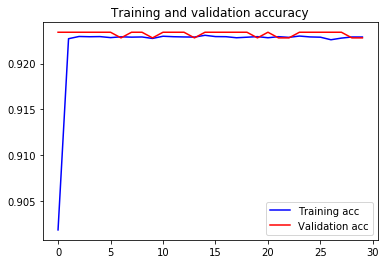

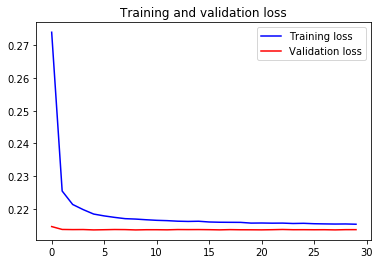

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()